In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data2.csv", names=["騒音", "再生音量"])
df["再生音量（実数値）"] = df["再生音量"] / 15
df

,騒音,再生音量,再生音量（実数値）
0,11000,3,0.200000
1,10500,3,0.200000
2,10000,3,0.200000
3,9500,2,0.133333
4,9000,2,0.133333
5,8500,2,0.133333
6,8000,2,0.133333
7,7500,2,0.133333
8,7000,2,0.133333
9,6500,2,0.133333


Text(0, 0.5, 'play_level')

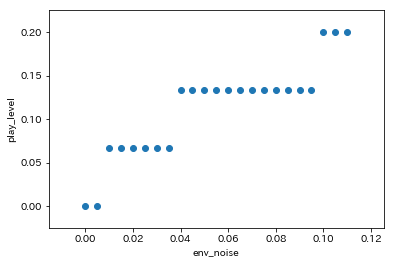

In [19]:
x = df.loc[:,"騒音"] / 100000
y = df.loc[:,"再生音量（実数値）"]
plt.scatter(x, y)
plt.xlabel("env_noise")
plt.ylabel("play_level")

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
print(lr.score(np.array(x).reshape(-1, 1),y), lr.intercept_, lr.coef_)

0.8187799043062202 0.03260869565217393 [1.46245059]


In [21]:
# a + bx + cx^2 にフィットさせる
lr2 = LinearRegression().fit(np.dstack((np.power(np.array(x),2),np.array(x)))[0], y)
print(lr2.score(np.dstack((np.power(np.array(x),2),np.array(x)))[0],y), lr2.intercept_, lr2.coef_)

0.8389230652388547 0.01768115942028997 [-7.75456428  2.31545266]


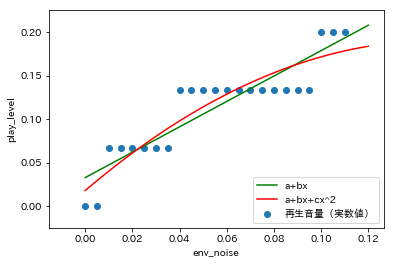

In [23]:
RNG = np.linspace(0, 0.12, 100)
plt.scatter(x, y)
plt.xlabel("env_noise")
plt.ylabel("play_level")
plt.plot(RNG, lr.intercept_ + lr.coef_ * RNG, label="a+bx", color="green")
plt.plot(RNG, lr2.intercept_ + lr2.coef_[1] * RNG + lr2.coef_[0] * RNG * RNG, label="a+bx+cx^2", color="red")
plt.legend(loc='lower right')

In [8]:
DIV_NUM = 15
def if_func(x):
    if x < 750:
        return 0/DIV_NUM
    elif x < 3750:
        return 1/DIV_NUM
    elif x < 9750:
        return 2/DIV_NUM
    else:
        return 3/DIV_NUM

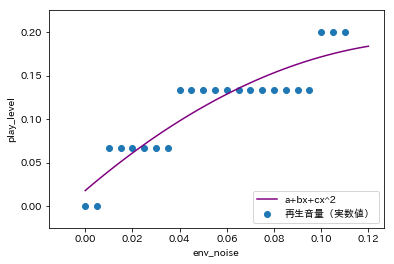

In [24]:
RNG = np.linspace(0, 0.12, 100)
plt.scatter(x, y)
plt.xlabel("env_noise")
plt.ylabel("play_level")
# plt.plot(RNG, np.ceil(lr2.intercept_ + lr2.coef_[1] * RNG + lr2.coef_[0] * RNG * RNG), label="a+bx+cx^2 ceil", color="green")
# plt.plot(RNG, np.floor(lr2.intercept_ + lr2.coef_[1] * RNG + lr2.coef_[0] * RNG * RNG), label="a+bx+cx^2 floor", color="red")
plt.plot(RNG, lr2.intercept_ + lr2.coef_[1] * RNG + lr2.coef_[0] * RNG * RNG, label="a+bx+cx^2", color="purple")
# plt.plot(RNG, np.vectorize(if_func)(RNG), label = "if_func", color="yellow")
plt.legend(loc='lower right')

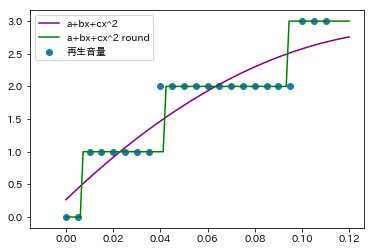

In [25]:
plt.scatter(x, df["再生音量"])
plt.plot(RNG, DIV_NUM * (lr2.intercept_ + lr2.coef_[1] * RNG + lr2.coef_[0] * RNG * RNG), label="a+bx+cx^2", color="purple")
plt.plot(RNG, np.round(DIV_NUM * (lr2.intercept_ + lr2.coef_[1] * RNG + lr2.coef_[0] * RNG * RNG)), label="a+bx+cx^2 round", color="green")
plt.legend()